1.(Easy)

In [1]:
import pandas as pd
df = pd.read_csv('marketing_campaign.csv', sep=";")
compl_cnt = df["Complain"].sum()
compl_cnt

21

In [2]:
avg_dt_birth = int(df["Year_Birth"].mean()) #average year of birth
avg_age = 2024 - avg_dt_birth

df["sum_of_spendings"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]
avg_customer_dt_birth = int(df[df["sum_of_spendings"] > 0]["Year_Birth"].mean()) #average customer's year of birth
avg_customer_age = 2024 - avg_customer_dt_birth

print(avg_age, avg_customer_age)

56 56


То есть, средний возраст всех людей и средний возраст покупателей - не отличаются

2.(Medium)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Исходя из датасета и здравого смысла, параметр Education может быть связан с: Income, NumWebPurchases, NumStorePurchases  и возрастом. Изобразим графики ниже: 

Text(0.5, 0, 'Education')

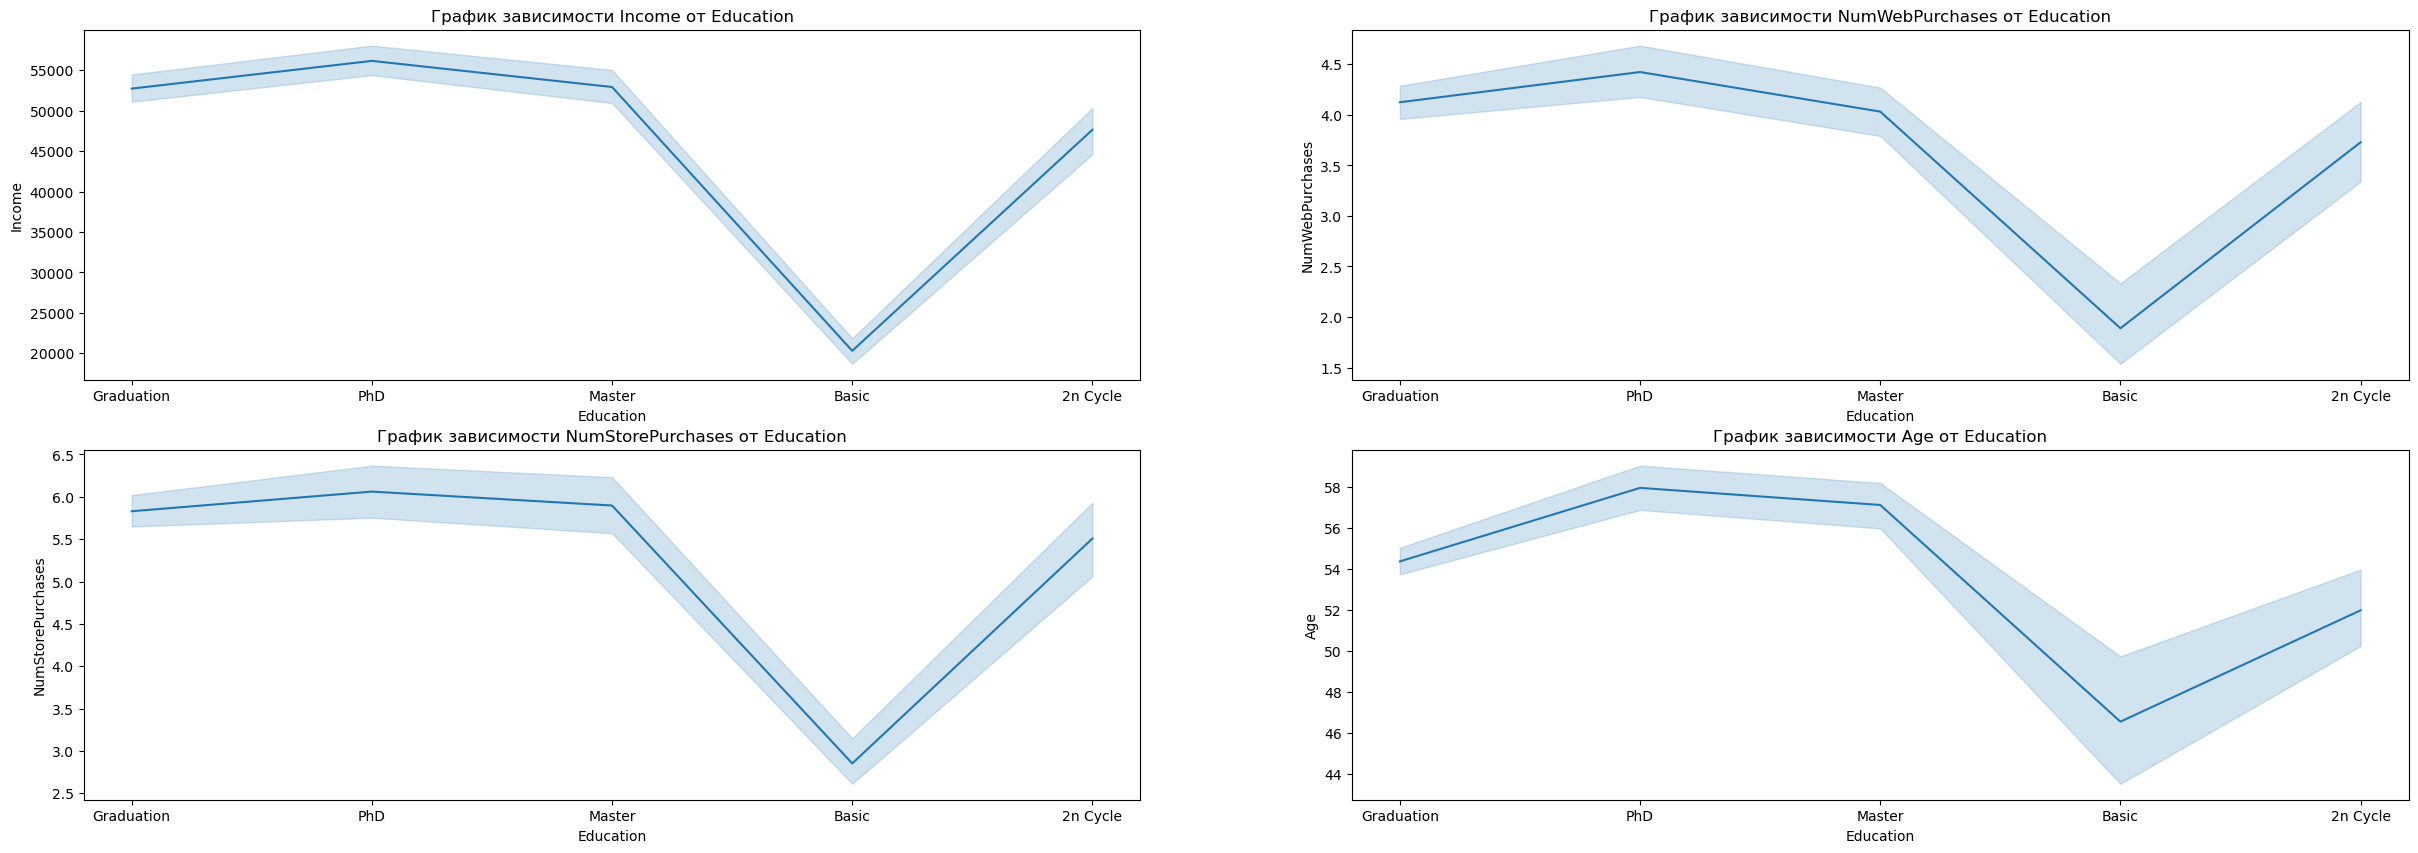

In [4]:
fig, axs = plt.subplots(2, 2, figsize = (30, 10))
df["Age"] = 2024 - df["Year_Birth"]
sns.lineplot(data = df, x = "Education", y = "Income", ax=axs[0, 0]).set(title = "График зависимости Income от Education")
plt.ylabel("Income")
plt.xlabel("Education")
sns.lineplot(data = df, x = "Education", y = "NumWebPurchases", ax=axs[0, 1]).set(title = "График зависимости NumWebPurchases от Education")
plt.ylabel("NumWebPurchases")
plt.xlabel("Education")
sns.lineplot(data = df, x = "Education", y = "NumStorePurchases", ax=axs[1, 0]).set(title = "График зависимости NumStorePurchases от Education")
plt.ylabel("NumStorePurchases")
plt.xlabel("Education")
sns.lineplot(data = df, x = "Education", y = "Age", ax=axs[1, 1]).set(title = "График зависимости Age от Education")
plt.ylabel("Age")
plt.xlabel("Education")

Графики получились похожими)) Из этого можно сделать вывод, что чем больше люди учились, тем выше их материальное состояние и количество покупок. Касательно зависимости возраста от образования - чем выше степень ученности, тем больше возраст, что в целом логично.

Теперь посмотрим на зависимости Marital_Status от различных параметров:

Text(0.5, 0, 'Marital_Status')

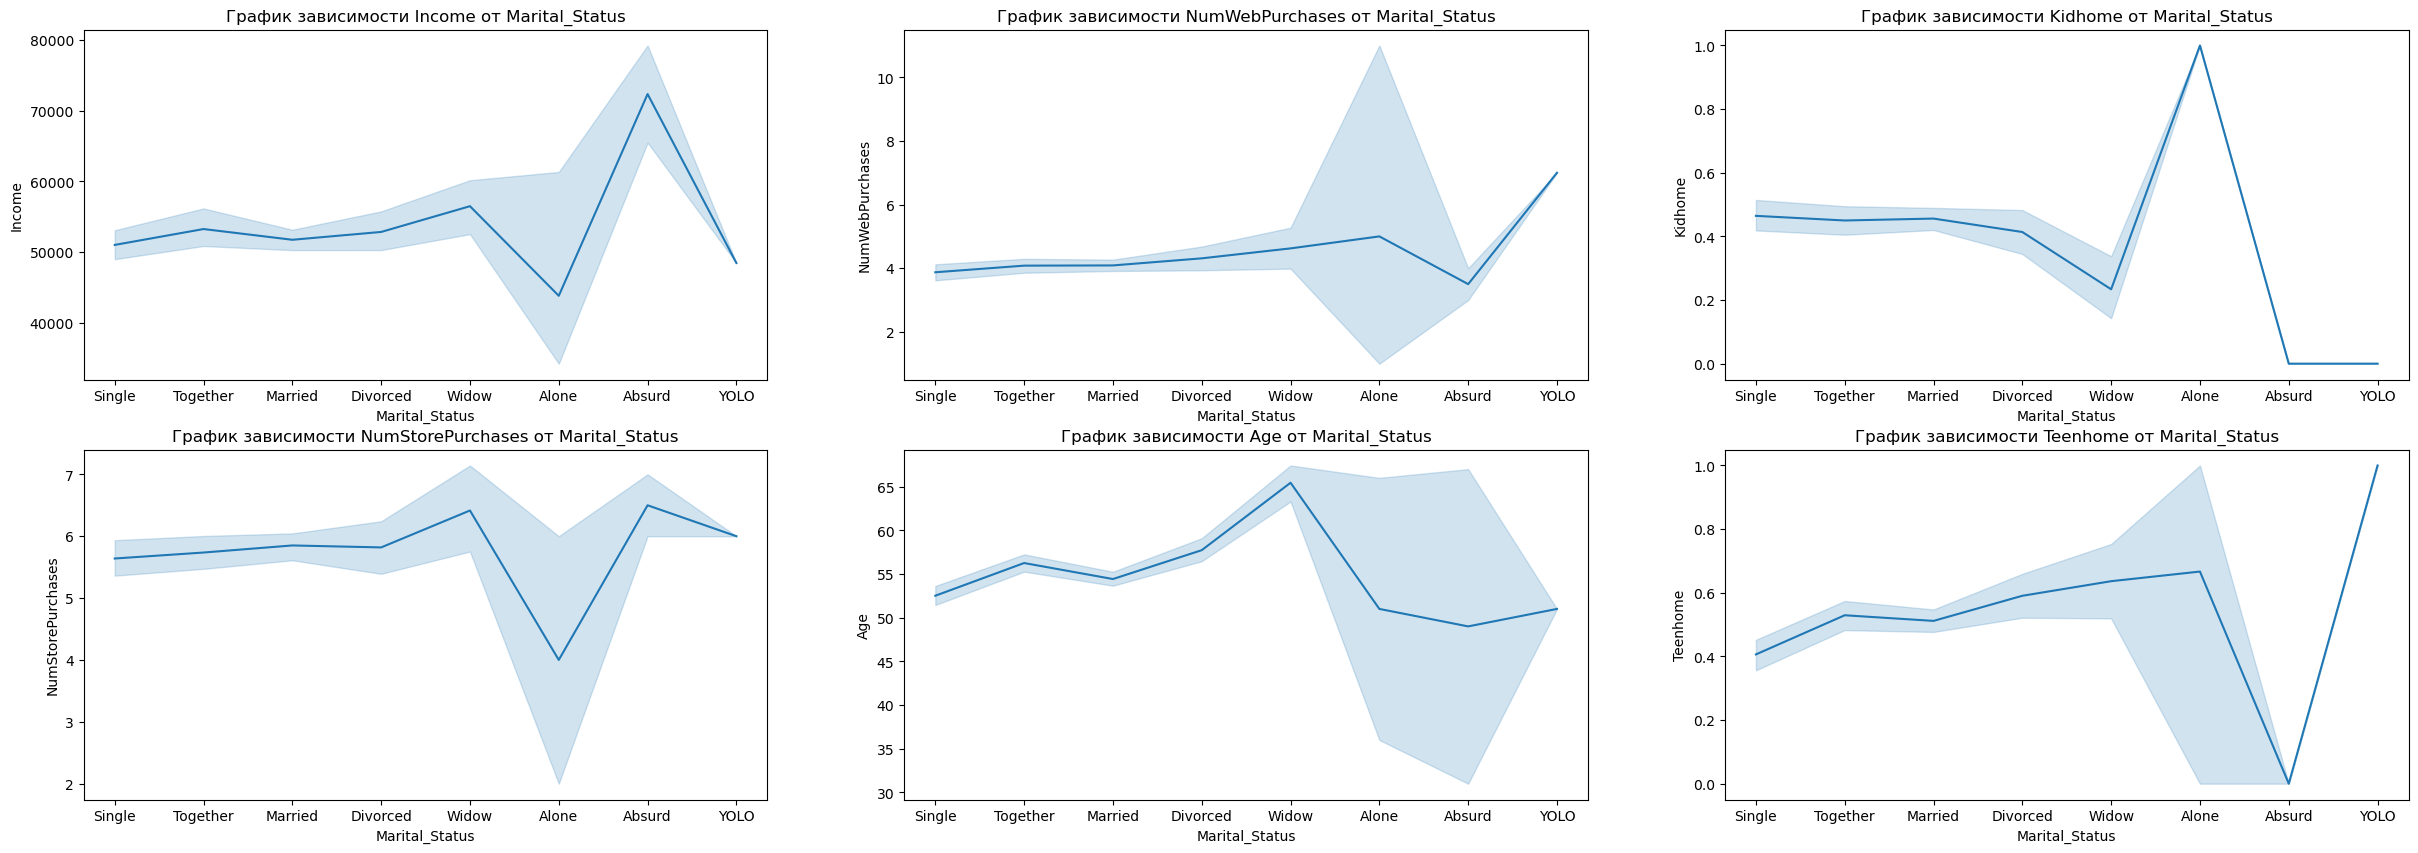

In [5]:
fig, axs = plt.subplots(2, 3, figsize = (30, 10))
df["Age"] = 2024 - df["Year_Birth"]
sns.lineplot(data = df, x = "Marital_Status", y = "Income", ax=axs[0, 0]).set(title = "График зависимости Income от Marital_Status")
plt.ylabel("Income")
plt.xlabel("Marital_Status")
sns.lineplot(data = df, x = "Marital_Status", y = "NumWebPurchases", ax=axs[0, 1]).set(title = "График зависимости NumWebPurchases от Marital_Status")
plt.ylabel("NumWebPurchases")
plt.xlabel("Marital_Status")
sns.lineplot(data = df, x = "Marital_Status", y = "NumStorePurchases", ax=axs[1, 0]).set(title = "График зависимости NumStorePurchases от Marital_Status")
plt.ylabel("NumStorePurchases")
plt.xlabel("Marital_Status")
sns.lineplot(data = df, x = "Marital_Status", y = "Age", ax=axs[1, 1]).set(title = "График зависимости Age от Marital_Status")
plt.ylabel("Age")
plt.xlabel("Marital_Status")
sns.lineplot(data = df, x = "Marital_Status", y = "Kidhome", ax=axs[0, 2]).set(title = "График зависимости Kidhome от Marital_Status")
plt.ylabel("Kidhome")
plt.xlabel("Marital_Status")
sns.lineplot(data = df, x = "Marital_Status", y = "Teenhome", ax=axs[1, 2]).set(title = "График зависимости Teenhome от Marital_Status")
plt.ylabel("Teenhome")
plt.xlabel("Marital_Status")

Касательно финансов - у одиноких больше интернет - покупок, но остальные показатели ниже. В целом у разведенных и одиноких с финансами хуже, чем у женатых или Absurd(?). У YOLO(тех кто "живет один раз") зарплаты ниже, но покупок больше, что и оправдывает их название. Возраст и количество детей и тинейджеров в целом тоже соответствует действительности. Одинокие и YOLO моложе, чем женатые или в разводе, и имеют меньше детей. 

Осталось проанализировать еще 4 осмысленные зависимости:

Text(0.5, 0, 'Teenhome')

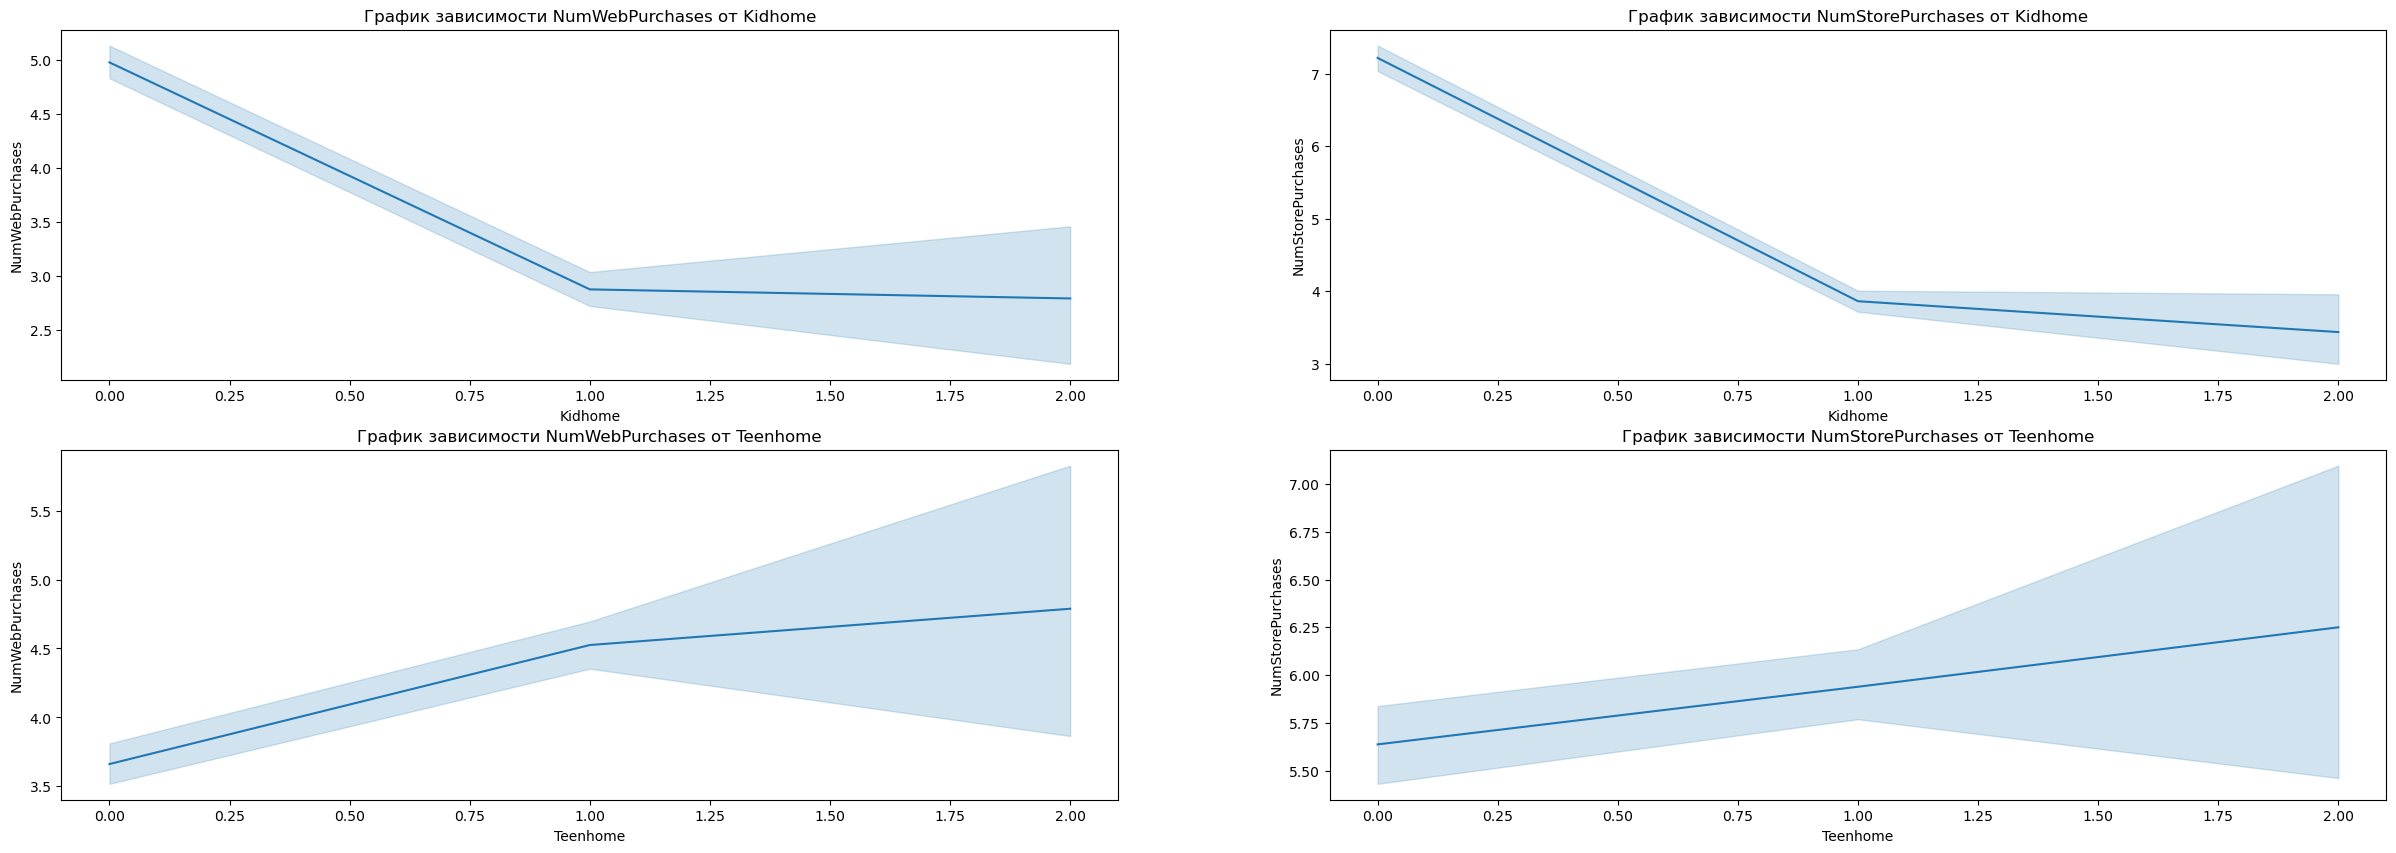

In [6]:
fig, axs = plt.subplots(2, 2, figsize = (30, 10))
df["Age"] = 2024 - df["Year_Birth"]
sns.lineplot(data = df, x = "Kidhome", y = "NumWebPurchases", ax=axs[0, 0]).set(title = "График зависимости NumWebPurchases от Kidhome")
plt.ylabel("NumWebPurchases")
plt.xlabel("Kidhome")
sns.lineplot(data = df, x = "Kidhome", y = "NumStorePurchases", ax=axs[0, 1]).set(title = "График зависимости NumStorePurchases от Kidhome")
plt.ylabel("NumStorePurchases")
plt.xlabel("Kidhome")
sns.lineplot(data = df, x = "Teenhome", y = "NumWebPurchases", ax=axs[1, 0]).set(title = "График зависимости NumWebPurchases от Teenhome")
plt.ylabel("NumWebPurchases")
plt.xlabel("Teenhome")
sns.lineplot(data = df, x = "Teenhome", y = "NumStorePurchases", ax=axs[1, 1]).set(title = "График зависимости NumStorePurchases от Teenhome")
plt.ylabel("NumStorePurchases")
plt.xlabel("Teenhome")

У тех, у кого дома тинейджеры - число интернет-покупок - выше, у тех, кого дома дети - число интернет-покупок - ниже.
Вещи для тинейджеров также покупают и в обычных магазинах. Для детей же покупки в магазине не часто совершают, что немного странно, ведь многие вещи для детей наверное лучше брать в магазине, а не заказывать... хотя, времени из-за детей мало, наверное, поэтому взрослые и совершают интернет-покупки.

3.(Hard)

Касательно целевой аудитории магазина - магазину интересны те люди, которые приносят им деньги. В частности, надо понять, какие группы людей чаще совершают online и offline покупки и при этом, надо учесть, что уровень зарплаты тоже влияет на покупки. Как уже ранее выяснили, у более образованных людей: {"Graduation", "PhD", "Master Education"} - более высокая зарплата(поэтому вместо зарплаты проще рассматривать их, хотя отдельно конечно же можно было бы добавить еще фильтр по зарплате). В прошлой задаче также стало понятно, что люди со следующим семейным положением: {"Widow", "Absurd", "Alone", "Yolo"} больше покупают("Widow", "Absurd" - больше покупок в магазине, "Alone", "Yolo" - больше интернет-покупок). При этом, возраст скорее не надо учитывать, потому что у более образованных он может быть высоким, а если рассмотреть семейное положение - там, в целом, может быть различным. То есть, возраст предоставляет менее точную информацию касательно покупок, чем другие категории, так что я бы его в данном случае не включал в целевую аудиторию(хотя тут можно рассуждать про то, что слишком старые и молодые меньше приносят денег, но ладно). Тогда:

In [7]:
edu_targ_aud = (df["Education"] == "Graduation") | (df["Education"] == "PhD") | (df["Education"] == "Master Education")
mart_status_targ_aud = (df["Marital_Status"] == "Widow") | (df["Marital_Status"] == "Absurd") | (df["Marital_Status"] == "Alone") | (df["Marital_Status"] == "YOLO")
target_audience = df[edu_targ_aud & mart_status_targ_aud]
target_audience_id = target_audience["ID"]
print(sorted(list(target_audience_id)))

[13, 92, 123, 202, 271, 313, 453, 492, 591, 819, 1453, 1968, 2150, 2154, 2173, 2591, 2740, 3009, 3678, 3945, 4686, 4945, 5084, 5092, 5441, 6250, 6428, 6518, 6609, 6878, 7094, 7101, 7232, 7247, 7485, 7530, 7660, 7699, 7734, 7851, 8041, 8537, 8594, 8595, 8614, 8629, 8650, 8842, 9058, 9204, 9213, 9336, 9589, 9729, 9760, 10102, 10352, 10473, 10530, 10591, 10868, 10955, 10972, 11133]
